# Working with SpECTRE data

In [47]:
import spectre
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from spectre.Visualization.Plot import DEFAULT_MPL_STYLESHEET

plt.style.use(DEFAULT_MPL_STYLESHEET)

## Working with reduction data

- Use `pandas`
- Use either `h5py` or `spectre.IO.H5`

In [48]:
from spectre.Visualization.ReadH5 import to_dataframe
import h5py

In [49]:
segment_dir = Path("/central/groups/sxs/geoffrey/BBH/2024_12_15/v2/h1p8/Segment_0000")

### Example: constraint norms

> **On the command line:** Try `spectre plot dat --help`.

In [50]:
with h5py.File(segment_dir / "BbhReductions.h5") as open_reductions_file:
    norms = to_dataframe(open_reductions_file["Norms.dat"]).set_index("Time")

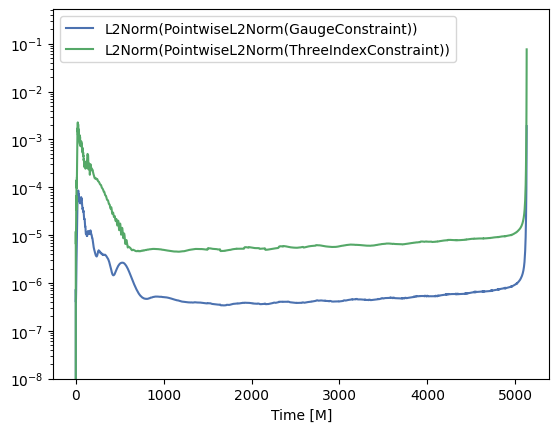

In [52]:
norm_labels = [label for label in norms.columns if "Constraint" in label]
norms[norm_labels].plot()
plt.yscale("log")
plt.ylim(1e-8, None)
plt.xlabel("Time [M]");

## Example: horizon quantities

In [53]:
with h5py.File(segment_dir / "BbhReductions.h5") as open_reductions_file:
    AhA = to_dataframe(open_reductions_file["ObservationAhA.dat"]).set_index("Time")

<Axes: xlabel='Time'>

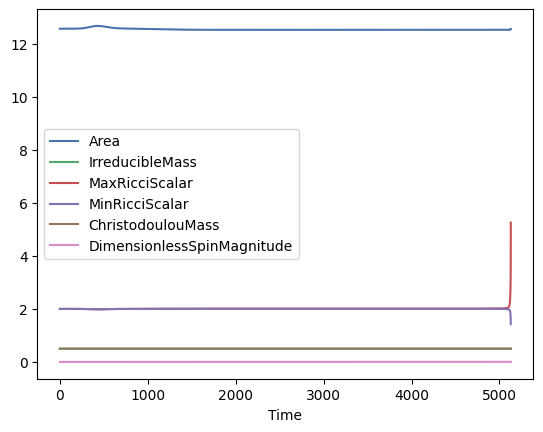

In [54]:
AhA.plot()

### Example: trajectories

> **On the command line:** Try `spectre plot trajectories --help`.

In [55]:
with h5py.File(segment_dir / "BbhReductions.h5") as open_reductions_file:
    AhA_coords = to_dataframe(
        open_reductions_file["ApparentHorizons/ControlSystemAhA_Centers.dat"]
    ).set_index("Time")
    AhB_coords = to_dataframe(
        open_reductions_file["ApparentHorizons/ControlSystemAhB_Centers.dat"]
    ).set_index("Time")

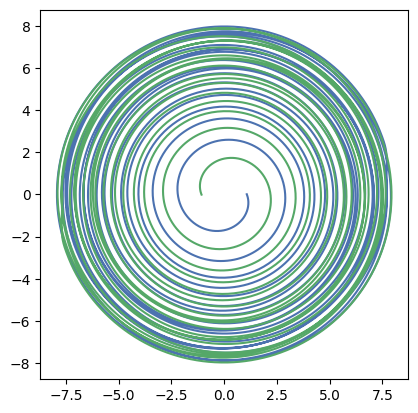

In [56]:
plt.plot(AhA_coords["InertialCenter_x"], AhA_coords["InertialCenter_y"])
plt.plot(AhB_coords["InertialCenter_x"], AhB_coords["InertialCenter_y"])
plt.gca().set_aspect("equal")

## Working with volume data

> **On the command line:** Try `spectre generate-xdmf --help`, then open in
> ParaView.

> **On the command line:** Try `spectre plot {along-line|slice} --help`.

In [57]:
import glob
from spectre.Visualization.OpenVolfiles import open_volfiles
from spectre.Visualization.ReadH5 import list_observations
from spectre.IO.Exporter import interpolate_to_points

In [58]:
volfiles = glob.glob(str(segment_dir / "BbhVolume*.h5"))
obs_ids, obs_times = list_observations(
    open_volfiles(volfiles, subfile_name="VolumeData")
)

In [59]:
# Coordinates of a regular grid in the xy plane
x, y = np.meshgrid(np.linspace(-15, 15, 300), np.linspace(-15, 15, 300))
z = np.zeros(x.shape)

lapse = np.array(
    interpolate_to_points(
        volfiles,
        subfile_name="VolumeData",
        observation_id=obs_ids[0],
        tensor_components=["Lapse"],
        target_points=[x.flatten(), y.flatten(), z.flatten()],
    )[0]
).reshape(x.shape)

/tmp/ipykernel_1631773/339517332.py:2: RuntimeWarning: invalid value encountered in subtract
  plt.contourf(x, y, np.log(1 - lapse))


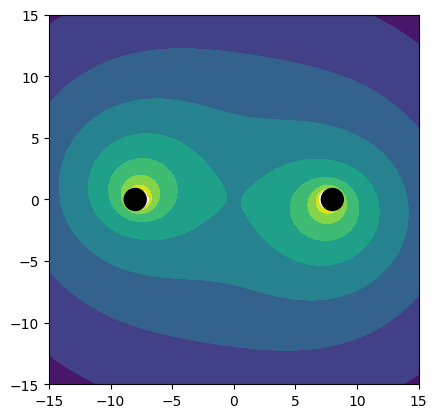

In [60]:
# Plot lapse
plt.contourf(x, y, np.log(1 - lapse))

# Plot circles for black holes
ax = plt.gca()
for bh_pos in [-8, 8]:
    ax.add_patch(plt.Circle(xy=(bh_pos, 0), radius=0.89, color="black", fill=True))

# Make plot square
ax.set_aspect("equal")

### Transforming volume data

> **On the command line:** Try `spectre transform-vol --help`.

In [61]:
from spectre.Visualization.TransformVolumeData import transform_volume_data, Kernel

### Power monitors

## Finding horizons in volume data

## Working with horizons

## Working with worldtube data & CCE